#**IMPORTING ALL THE NECESSARY LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import pickle

#**DATA COLLECTION AND PRE-PROCESSING**

**----------IMPORTING THE DATASET----------**

In [ ]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/sample_data/heart_disease_data.csv')

**----------BASIC EDA----------**

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
heart_data.shape

(303, 14)

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**----------ADVANCED EDA----------**

In [ ]:
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


*Observation: No missing values in the whole dataset*

In [ ]:
heart_data.duplicated().sum()

np.int64(1)

*Observation: 1 duplicate row*

In [ ]:
heart_data.drop_duplicates(inplace=True)
heart_data.shape

(302, 14)

*Observation: Removed a duplicated row*

In [ ]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

,count
target,
1,164
0,138


1 --> Heart Disease

0 --> Healthy Heart

**----------CHECKING OUTLIERS----------**

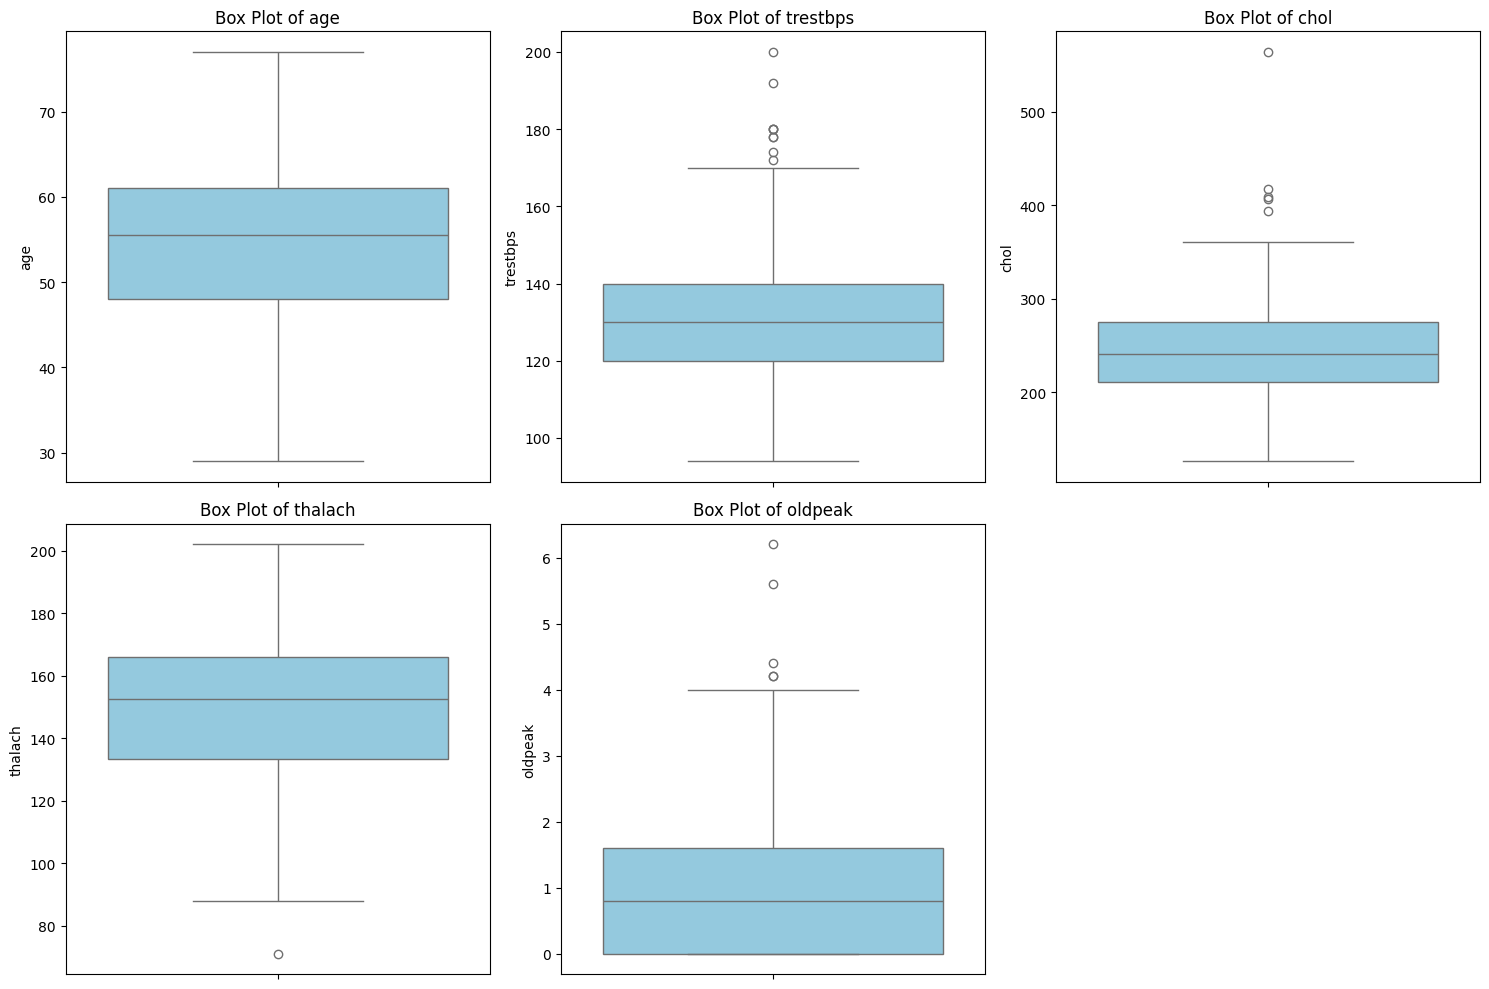

In [ ]:
# Define the continuous features we want to check
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create a figure to hold the subplots
plt.figure(figsize=(15, 10))

# Loop through each continuous feature and create a box plot
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=heart_data[feature], color='skyblue')
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

*Observation: some features like 'chol', 'trestbps' and 'oldpeak' showed statistical outliers, these were considered clinically significant data points representing high-risk patients. Therefore, a decision was made not to remove these outliers, as they contain valuable information for the model*

**----------DATA VISUALIZATION (UNIVARIATE, BIVARIATE AND MULTIVARIATE)----------**

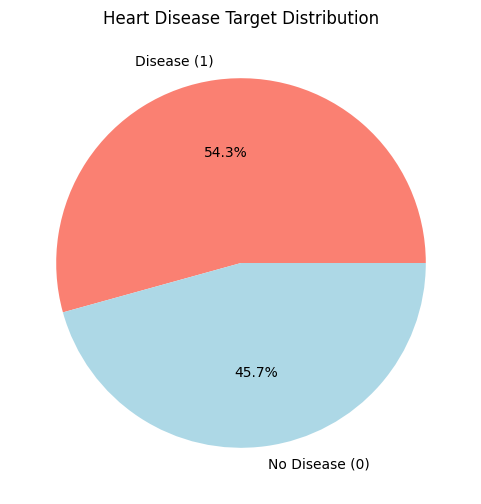

In [ ]:
# Target Variable Distribution (Univariate)
plt.figure(figsize=(6, 6))
heart_data['target'].value_counts().plot(kind='pie', autopct='%.1f%%', labels=['Disease (1)', 'No Disease (0)'], colors=['salmon', 'lightblue'])
plt.title('Heart Disease Target Distribution')
plt.ylabel('') # Hides the 'target' label on the y-axis
plt.show()

*Observation: Majority of people from the dataset have heart disease with percentage of approximately 54%*

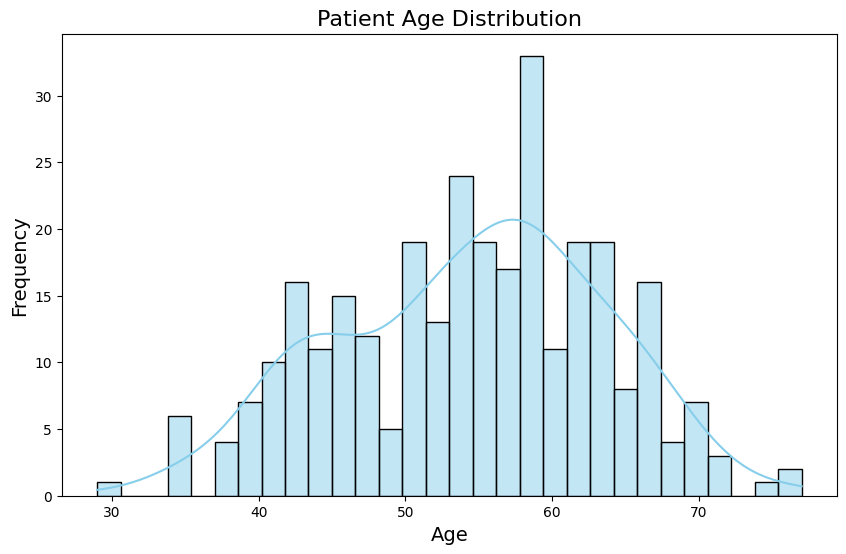

In [ ]:
# Univariate Analysis: Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(heart_data['age'], kde=True, bins=30, color='skyblue')
plt.title('Patient Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

*Observation: majority of patients in the dataset are in the 50-65 age range*

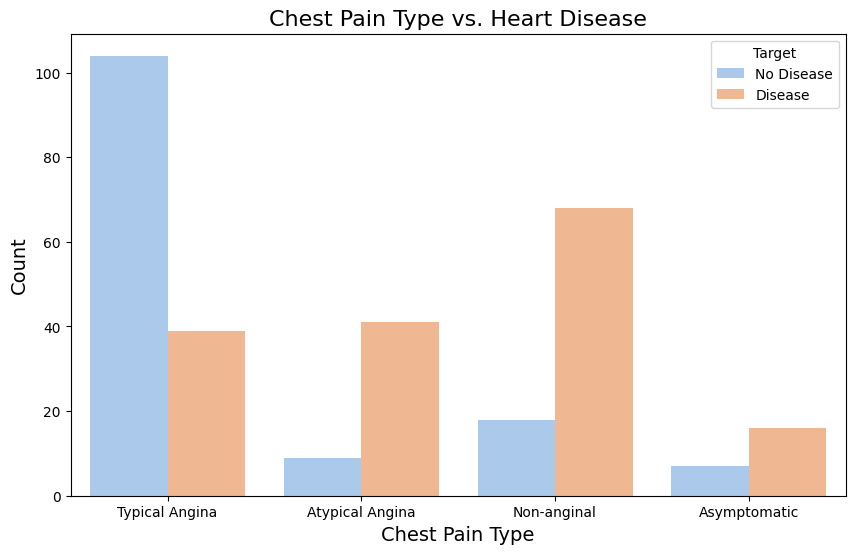

In [ ]:
# Bivariate Analysis: Chest Pain Type vs. Target
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', data=heart_data, hue='target', palette='pastel')
plt.title('Chest Pain Type vs. Heart Disease', fontsize=16)
plt.xlabel('Chest Pain Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-anginal', 'Asymptomatic'])
plt.legend(title='Target', labels=['No Disease', 'Disease'])
plt.show()

*Observation: patients with "Non-anginal" (Type 2) or "Atypical Angina" (Type 1) chest pain are much more likely to have heart disease compared to those with "Typical Angina" (Type 0). This suggests cp is a very strong predictor.*

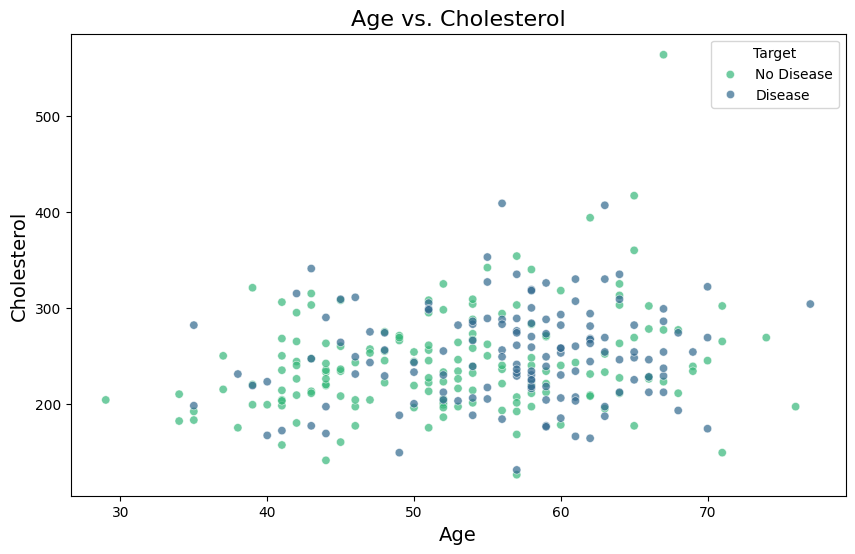

In [ ]:
# Bivariate Analysis: Age vs. Cholesterol
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='chol', data=heart_data, hue='target', palette='viridis', alpha=0.7)
plt.title('Age vs. Cholesterol', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Cholesterol', fontsize=14)
plt.legend(title='Target', labels=['No Disease', 'Disease'])
plt.show()

*Observation: There is no as such separation, but we can say cholesterol levels might generally increase with age*

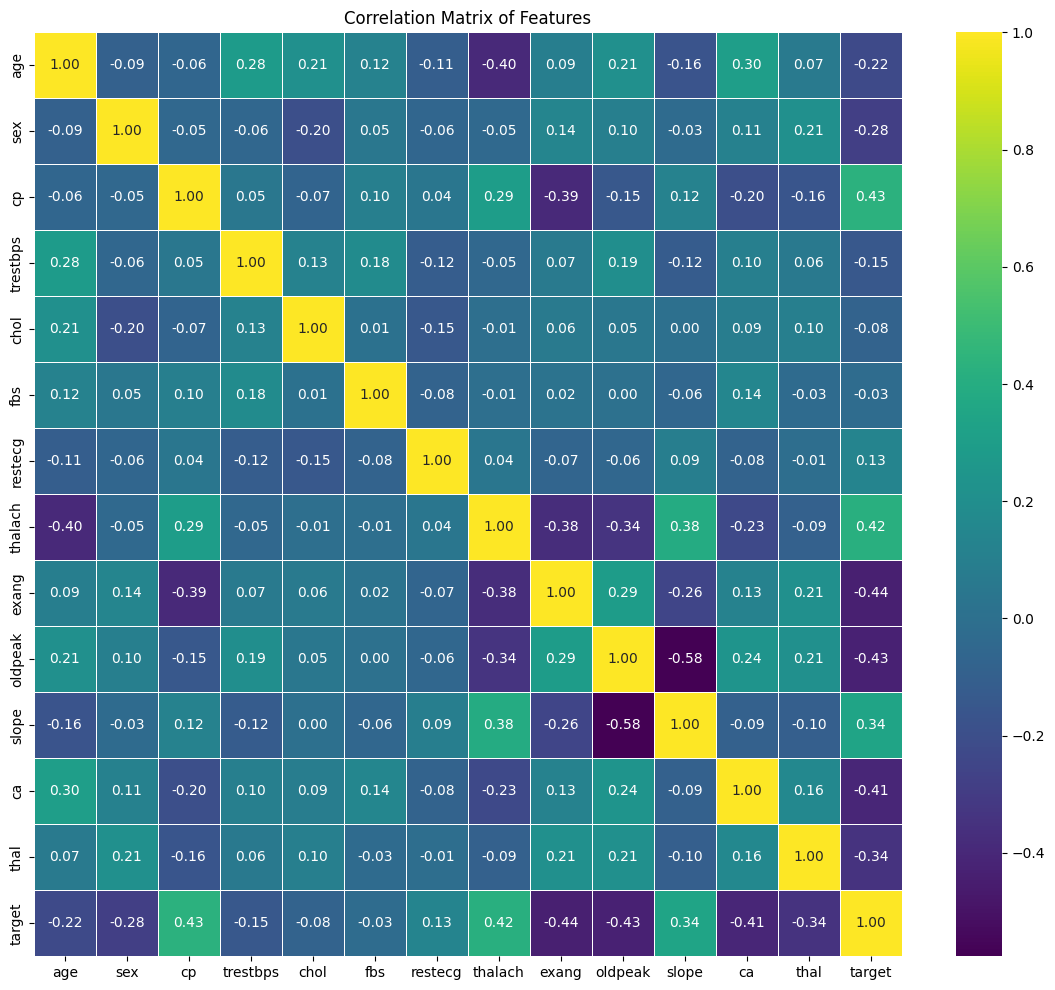

In [ ]:
# 2. Correlation Heatmap (Multivariate)
plt.figure(figsize=(14, 12))
sns.heatmap(heart_data.corr(), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

*Observation: 'exang', 'oldpeak', 'ca', 'thalach' and 'age' are the strongest predictors*

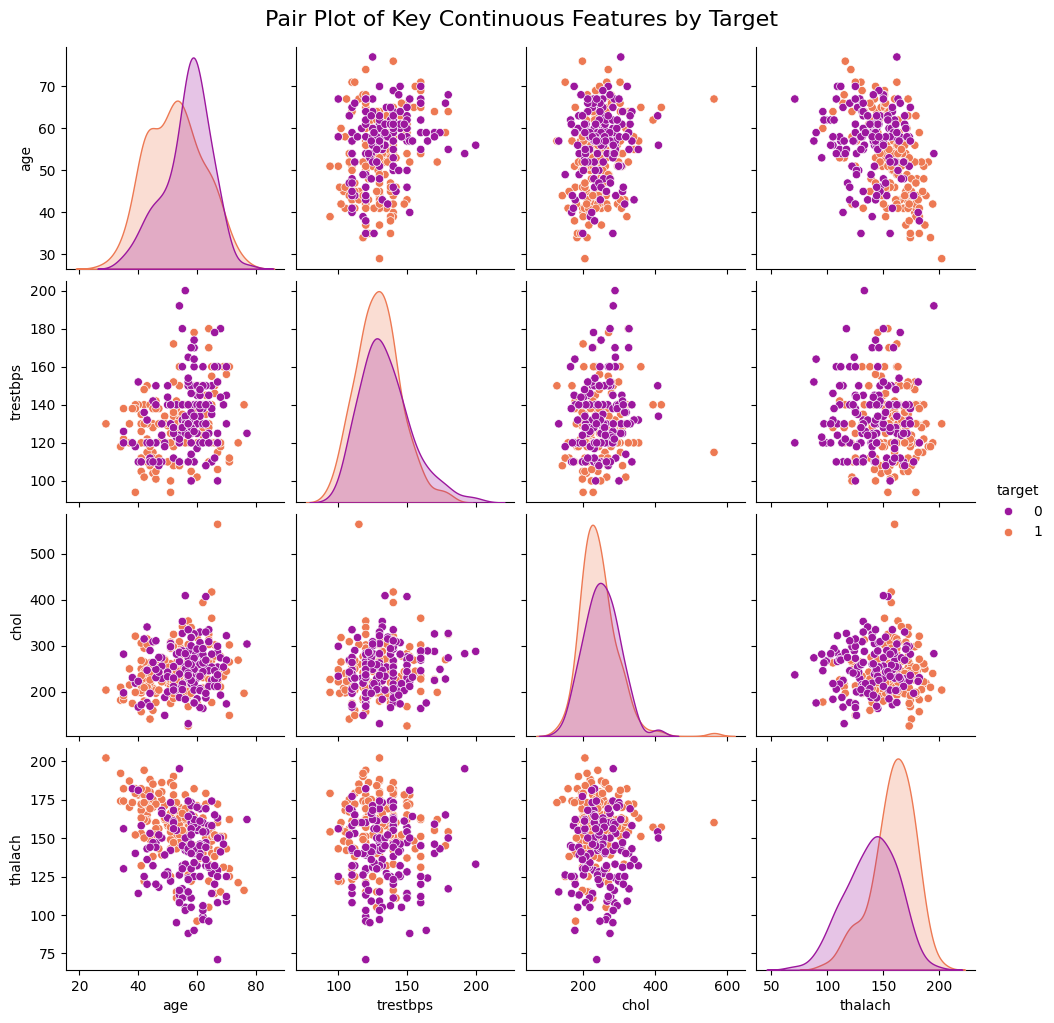

In [ ]:
# Multivariate Analysis: Pair Plot
# We'll select a few key continuous features plus the target for clarity.
# Plotting all features would be too crowded.
pair_plot_features = ['age', 'trestbps', 'chol', 'thalach', 'target']

sns.pairplot(heart_data[pair_plot_features], hue='target', palette='plasma', diag_kind='kde')
plt.suptitle('Pair Plot of Key Continuous Features by Target', y=1.02, fontsize=16)
plt.show()

*Observation: thalach vs age scatter plot shows a little noticeable separation.*

**----------FEATURE ENGINEERING (ENCODING AND SCALING)----------**

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


*Observation: Even though all the columns are numerical, KNN and SVM see numbers like 0, 1, 2, and 3 and assume there's a mathematical relationship. This is incorrect and will mislead your model, leading to poor performance.*

In [ ]:
# One-Hot Encoding for Categorical Variables
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
heart_data_encoded = pd.get_dummies(heart_data, columns=categorical_cols, drop_first=True)
heart_data_encoded.shape
heart_data_encoded.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,1,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,1,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


*Observation: Columns increased to total 23*

In [ ]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = RobustScaler()
heart_data_encoded[continuous_features] = scaler.fit_transform(heart_data_encoded[continuous_features])
heart_data_encoded.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.576923,0.75,-0.117647,-0.076336,0.9375,1,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.423077,0.00,0.149020,1.053435,1.6875,1,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.115385,0.00,-0.572549,0.595420,0.3750,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.038462,-0.50,-0.070588,0.778626,0.0000,1,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.115385,-0.50,1.780392,0.320611,-0.1250,1,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


Observation:

StandardScaler works by using the mean and standard deviation. The problem is that both of these metrics are very sensitive to outliers.

RobustScaler is specifically designed to handle this situation. Instead of the mean and standard deviation, it uses the median and the Interquartile Range (IQR).

The median is the middle value, so it isn't affected by extreme high or low numbers.

The IQR represents the middle 50% of the data, so it ignores the outliers at the ends.

since we kept the clinically important outliers in our heart disease data, RobustScaler is the better choice

**----------TRAIN-TEST SPLIT----------**

In [ ]:
X = heart_data_encoded.drop('target', axis=1)
y = heart_data_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X.shape, X_train.shape, X_test.shape)

(302, 22) (241, 22) (61, 22)


#**MODEL DEVELOPMENT AND HYPERPARAMETER TUNING**

In [ ]:
model_performance = {}

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': np.arange(3, 20), 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)
y_pred_knn = grid_knn.predict(X_test)
model_performance['KNN'] = {'Accuracy': accuracy_score(y_test, y_pred_knn), 'Precision': precision_score(y_test, y_pred_knn), 'Recall': recall_score(y_test, y_pred_knn), 'F1 Score': f1_score(y_test, y_pred_knn)}
print(f"Best KNN Params: {grid_knn.best_params_}\n")

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 10]}
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)
y_pred_dt = grid_dt.predict(X_test)
model_performance['Decision Tree'] = {'Accuracy': accuracy_score(y_test, y_pred_dt), 'Precision': precision_score(y_test, y_pred_dt), 'Recall': recall_score(y_test, y_pred_dt), 'F1 Score': f1_score(y_test, y_pred_dt)}
print(f"Best Decision Tree Params: {grid_dt.best_params_}\n")

# Random Forest
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [5, 10, None]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.predict(X_test)
model_performance['Random Forest'] = {'Accuracy': accuracy_score(y_test, y_pred_rf), 'Precision': precision_score(y_test, y_pred_rf), 'Recall': recall_score(y_test, y_pred_rf), 'F1 Score': f1_score(y_test, y_pred_rf)}
print(f"Best Random Forest Params: {grid_rf.best_params_}\n")

# Support Vector Machine (SVM)
svm = SVC(random_state=42, probability=True)
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)
y_pred_svm = grid_svm.predict(X_test)
model_performance['SVM'] = {'Accuracy': accuracy_score(y_test, y_pred_svm), 'Precision': precision_score(y_test, y_pred_svm), 'Recall': recall_score(y_test, y_pred_svm), 'F1 Score': f1_score(y_test, y_pred_svm)}
print(f"Best SVM Params: {grid_svm.best_params_}\n")

# XGBoost
xgb_clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
param_grid_xgb = {'n_estimators': [50, 100], 'max_depth': [3, 5], 'learning_rate': [0.1, 0.05]}
grid_xgb = GridSearchCV(xgb_clf, param_grid_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)
y_pred_xgb = grid_xgb.predict(X_test)
model_performance['XGBoost'] = {'Accuracy': accuracy_score(y_test, y_pred_xgb), 'Precision': precision_score(y_test, y_pred_xgb), 'Recall': recall_score(y_test, y_pred_xgb), 'F1 Score': f1_score(y_test, y_pred_xgb)}
print(f"Best XGBoost Params: {grid_xgb.best_params_}\n")

Best KNN Params: {'n_neighbors': np.int64(8), 'weights': 'distance'}

Best Decision Tree Params: {'criterion': 'entropy', 'max_depth': 3}

Best Random Forest Params: {'max_depth': 5, 'n_estimators': 200}

Best SVM Params: {'C': 1, 'kernel': 'linear'}

Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}



#**COMPARATIVE ANALYSIS**

,Accuracy,Precision,Recall,F1 Score
KNN,0.721311,0.722222,0.787879,0.753623
Decision Tree,0.688525,0.666667,0.848485,0.746667
Random Forest,0.754098,0.750000,0.818182,0.782609
SVM,0.786885,0.763158,0.878788,0.816901
XGBoost,0.721311,0.735294,0.757576,0.746269


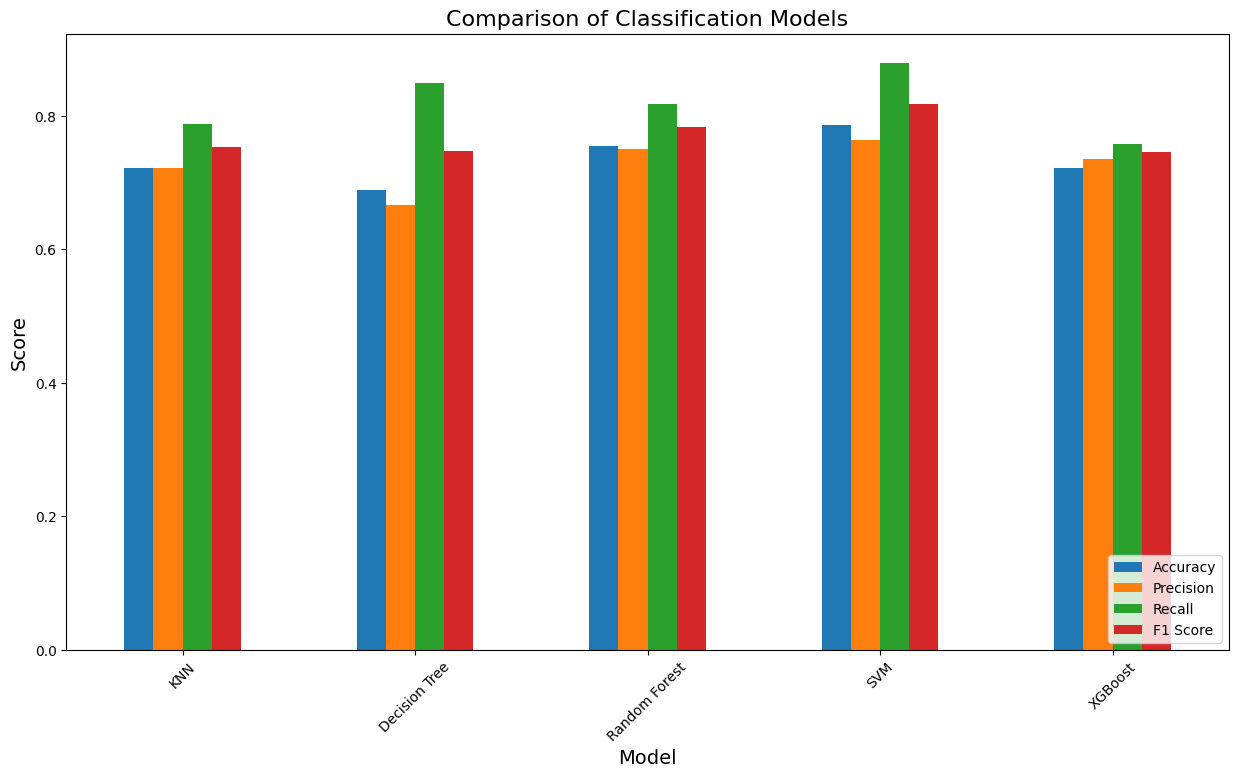

In [ ]:
performance_df = pd.DataFrame.from_dict(model_performance, orient='index')
display(performance_df)

# Plotting the results for a visual comparison
performance_df.plot(kind='bar', figsize=(15, 8))
plt.title('Comparison of Classification Models', size=16)
plt.xlabel('Model', size=14)
plt.ylabel('Score', size=14)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

*Observation: SVM having the best overall performance*

In [ ]:
# The best model from GridSearchCV is stored in the .best_estimator_ attribute
best_model = grid_svm.best_estimator_

with open('heart_disease_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)